# Reshaping Pandas DataFrames

![](https://cdn.hackersandslackers.com/2020/11/_retina/reshapingpandas-1@2x.jpg)

## Wide / summary form data 
In real data, we might have a large number of measurements on each line. And the data are presented in wide form (aka summary form) like the one below - each row presents a summary of one year with 12 separate measurements.


In [1]:
import pandas as pd

london_rain = pd.read_csv("https://raw.githubusercontent.com/csbfx/advpy122-data/master/london_rainfall.csv")
london_rain.head()

,Year,January,February,March,April,May,June,July,August,September,October,November,December
0,1960,479.0,480.0,339.0,124.0,456.0,428.0,672.0,608.0,753.0,1555.0,895.0,566.0
1,1961,644.0,551.0,57.0,508.0,172.0,292.0,262.0,476.0,648.0,568.0,525.0,886.0
2,1962,761.0,126.0,358.0,418.0,296.0,61.0,828.0,529.0,884.0,376.0,419.0,528.0
3,1963,129.0,66.0,682.0,521.0,337.0,483.0,281.0,534.0,490.0,347.0,1190.0,165.0
4,1964,178.0,168.0,951.0,735.0,461.0,1101.0,202.0,212.0,111.0,292.0,296.0,299.0


In [2]:
london_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       60 non-null     int64  
 1   January    60 non-null     float64
 2   February   60 non-null     float64
 3   March      60 non-null     float64
 4   April      60 non-null     float64
 5   May        60 non-null     float64
 6   June       60 non-null     float64
 7   July       60 non-null     float64
 8   August     59 non-null     float64
 9   September  59 non-null     float64
 10  October    59 non-null     float64
 11  November   59 non-null     float64
 12  December   59 non-null     float64
dtypes: float64(12), int64(1)
memory usage: 6.2 KB


Data in wide form makes it easy to answer some questions about the data. For example, the difference in rainfall between January and June:

In [4]:
london_rain["June"] - london_rain["January"]

0      -51.0
1     -352.0
2     -700.0
3      354.0
4      923.0
5      116.0
6      341.0
7      146.0
8     -102.0
9     -451.0
10      24.0
11     572.0
12    -399.0
13     555.0
14     141.0
15    -691.0
16     -76.0
17    -111.0
18    -307.0
19    -223.0
20     765.0
21      68.0
22     466.0
23    -352.0
24    -372.0
25     476.0
26    -884.0
27     588.0
28    -626.0
29      95.0
30    -316.0
31     189.0
32      99.0
33    -192.0
34    -630.0
35   -1026.0
36    -295.0
37     693.0
38     210.0
39     295.0
40      27.0
41    -361.0
42     232.0
43    -260.0
44    -315.0
45     110.0
46     -50.0
47      78.0
48    -234.0
49    -384.0
50    -394.0
51      72.0
52     764.0
53    -385.0
54   -1216.0
55    -512.0
56     186.0
57    -138.0
58    -570.0
59     520.0
dtype: float64

We can store that as a new column in the dataframe and visualize it

In [5]:
london_rain["January -> June difference"] = (
        london_rain["June"] - london_rain["January"]
)
london_rain.head()

,Year,January,February,March,April,May,June,July,August,September,October,November,December,January -> June difference
0,1960,479.0,480.0,339.0,124.0,456.0,428.0,672.0,608.0,753.0,1555.0,895.0,566.0,-51.0
1,1961,644.0,551.0,57.0,508.0,172.0,292.0,262.0,476.0,648.0,568.0,525.0,886.0,-352.0
2,1962,761.0,126.0,358.0,418.0,296.0,61.0,828.0,529.0,884.0,376.0,419.0,528.0,-700.0
3,1963,129.0,66.0,682.0,521.0,337.0,483.0,281.0,534.0,490.0,347.0,1190.0,165.0,354.0
4,1964,178.0,168.0,951.0,735.0,461.0,1101.0,202.0,212.0,111.0,292.0,296.0,299.0,923.0


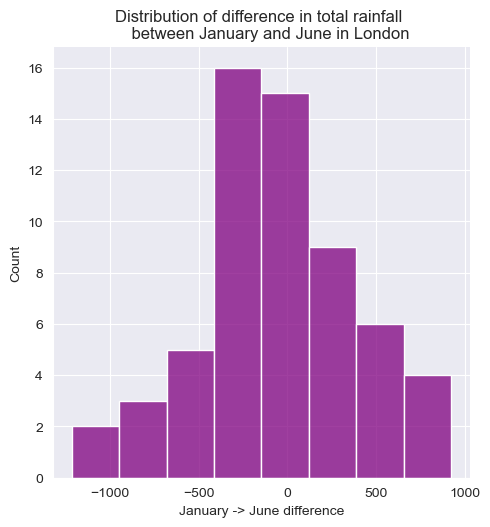

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(london_rain["January -> June difference"], color="purple")
plt.title(
    """Distribution of difference in total rainfall 
    between January and June in London""");

However, many other visualizations require the data to be in long-form or tidy form. With data in summary form, there is no way to use month as a category, so we can't draw charts that are colored by month, or draw a boxplot with month on the categorical axis. 

## Reshape data from wide (summary) to long (tidy) form using `melt`

In [7]:
london_rain = pd.read_csv("https://raw.githubusercontent.com/csbfx/advpy122-data/master/london_rainfall.csv")
london_rain.shape

(60, 13)

In [8]:
tidy_rain = london_rain.melt(
    id_vars=['Year'],  # columns that you want to keep unchanged
    var_name="Month",  # header for the summary columns
    value_name="Rainfall (mm)"  # header for the values
)
tidy_rain

,Year,Month,Rainfall (mm)
0,1960,January,479.0
1,1961,January,644.0
2,1962,January,761.0
3,1963,January,129.0
4,1964,January,178.0
...,...,...,...
715,2015,December,394.0
716,2016,December,104.0
717,2017,December,812.0
718,2018,December,664.0


Recall: a tidy dataset stores a unique observation per row. The dataframe `tidy_rain` above is a tidy dataset that has a single measurement per row. 

Now, we can use the month as a category to create a categorical plot using seaborn.

In [9]:
import numpy as np

np.sort(london_rain.Year.unique())

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019], dtype=int64)

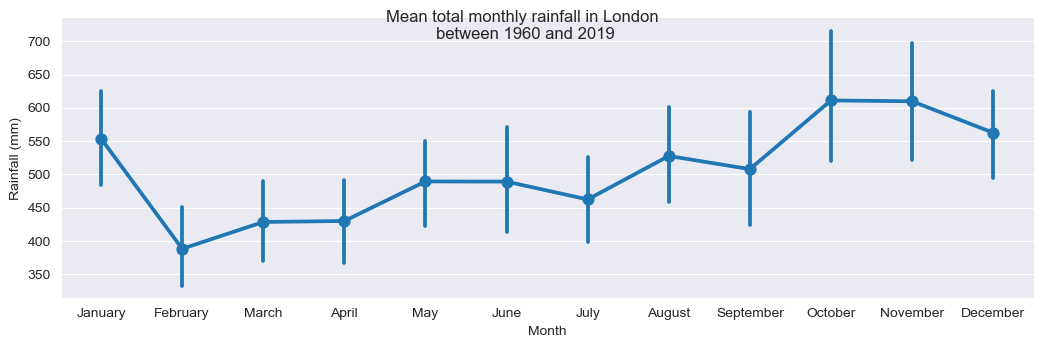

In [10]:
g = sns.catplot(
    data=tidy_rain,
    x="Month",
    y="Rainfall (mm)",
    kind="point",
    aspect=3,
    height=3.5
)

g.fig.suptitle('''Mean total monthly rainfall in London 
between 1960 and 2019''');

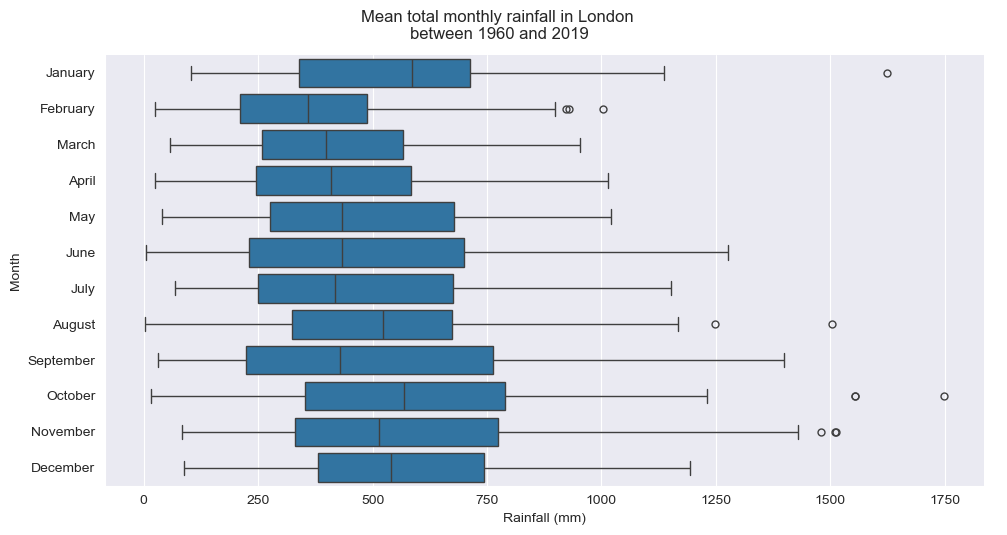

In [11]:
g = sns.catplot(
    data=tidy_rain,
    y="Month",
    x="Rainfall (mm)",
    kind="box",
    aspect=2
    #height=6
)
g.fig.suptitle('''Mean total monthly rainfall in London 
between 1960 and 2019''', y=1.06);

In addition to `melt`, pandas also another function called `wide_to_long`. We can use pandas’ `wide_to_long()` to reshape the wide dataframe into long/tall dataframe. Under the hood pandas `wide_to_long()` uses pandas’ `melt` function. However, Pandas’ wide_to_long() is easier to use. Another benefit of using pandas `wide_to_long()` is that we can easily take care of the prefix in the column names.

In [12]:
worldwide = pd.read_csv("https://raw.githubusercontent.com/csbfx/advpy122-data/master/worldwide_data.csv")
worldwide.head()

,continent,country,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,...,pop_1962,pop_1967,pop_1972,pop_1977,pop_1982,pop_1987,pop_1992,pop_1997,pop_2002,pop_2007
0,Africa,Algeria,2449.008185,3013.976023,2550.816880,3246.991771,4182.663766,4910.416756,5745.160213,5681.358539,...,11000948.0,12760499.0,14760787.0,17152804.0,20033753.0,23254956.0,26298373.0,29072015.0,31287142,33333216
1,Africa,Angola,3520.610273,3827.940465,4269.276742,5522.776375,5473.288005,3008.647355,2756.953672,2430.208311,...,4826015.0,5247469.0,5894858.0,6162675.0,7016384.0,7874230.0,8735988.0,9875024.0,10866106,12420476
2,Africa,Benin,1062.752200,959.601080,949.499064,1035.831411,1085.796879,1029.161251,1277.897616,1225.856010,...,2151895.0,2427334.0,2761407.0,3168267.0,3641603.0,4243788.0,4981671.0,6066080.0,7026113,8078314
3,Africa,Botswana,851.241141,918.232535,983.653976,1214.709294,2263.611114,3214.857818,4551.142150,6205.883850,...,512764.0,553541.0,619351.0,781472.0,970347.0,1151184.0,1342614.0,1536536.0,1630347,1639131
4,Africa,Burkina Faso,543.255241,617.183465,722.512021,794.826560,854.735976,743.387037,807.198586,912.063142,...,4919632.0,5127935.0,5433886.0,5889574.0,6634596.0,7586551.0,8878303.0,10352843.0,12251209,14326203


In [13]:
# examine the columns
worldwide.columns

Index(['continent', 'country', 'gdpPercap_1952', 'gdpPercap_1957',
       'gdpPercap_1962', 'gdpPercap_1967', 'gdpPercap_1972', 'gdpPercap_1977',
       'gdpPercap_1982', 'gdpPercap_1987', 'gdpPercap_1992', 'gdpPercap_1997',
       'gdpPercap_2002', 'gdpPercap_2007', 'lifeExp_1952', 'lifeExp_1957',
       'lifeExp_1962', 'lifeExp_1967', 'lifeExp_1972', 'lifeExp_1977',
       'lifeExp_1982', 'lifeExp_1987', 'lifeExp_1992', 'lifeExp_1997',
       'lifeExp_2002', 'lifeExp_2007', 'pop_1952', 'pop_1957', 'pop_1962',
       'pop_1967', 'pop_1972', 'pop_1977', 'pop_1982', 'pop_1987', 'pop_1992',
       'pop_1997', 'pop_2002', 'pop_2007'],
      dtype='object')

We need to specify "stubnames" to extract the prefix from column variable names. In our example, `stubnames=['lifeExp','gdpPercap','pop']`. We also need to specify how the column names are separated `sep='_'`. We also need to specify a column that is unique to each row. In our example, `i='country'` is unique to each row. And finally, we need to specify the new variable name we create. In our example `j='year'`.

In [16]:
world_tidy = pd.wide_to_long(worldwide, stubnames=['lifeExp', 'gdpPercap', 'pop'], i='country',
                             j='year', sep='_')
world_tidy

,,continent,lifeExp,gdpPercap,pop
country,year,,,,
Algeria,1952,Africa,43.077,2449.008185,9279525.0
Angola,1952,Africa,30.015,3520.610273,4232095.0
Benin,1952,Africa,38.223,1062.752200,1738315.0
Botswana,1952,Africa,47.622,851.241141,442308.0
Burkina Faso,1952,Africa,31.975,543.255241,4469979.0
...,...,...,...,...,...
Switzerland,2007,Europe,81.701,37506.419070,7554661.0
Turkey,2007,Europe,71.777,8458.276384,71158647.0
United Kingdom,2007,Europe,79.425,33203.261280,60776238.0


## CategoricalDtype

In [17]:
weather = pd.read_csv("https://raw.githubusercontent.com/csbfx/advpy122-data/master/weather.csv")
weather

,City,Year,Month,Day of year,Day of month,Mean temperature
0,Berlin,1960,January,1,1,6.4
1,Berlin,1960,January,2,2,8.1
2,Berlin,1960,January,3,3,5.4
3,Berlin,1960,January,4,4,3.9
4,Berlin,1960,January,5,5,6.0
...,...,...,...,...,...,...
63711,London,2018,October,300,27,4.9
63712,London,2018,October,301,28,7.4
63713,London,2018,October,302,29,5.8
63714,London,2018,October,303,30,6.6


In [18]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63716 entries, 0 to 63715
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              63716 non-null  object 
 1   Year              63716 non-null  int64  
 2   Month             63716 non-null  object 
 3   Day of year       63716 non-null  int64  
 4   Day of month      63716 non-null  int64  
 5   Mean temperature  63716 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 2.9+ MB


In [19]:
mean_temp = weather.groupby(["City", "Month"])["Mean temperature"].mean().reset_index()
mean_temp

,City,Month,Mean temperature
0,Berlin,April,9.364859
1,Berlin,August,18.931547
2,Berlin,December,1.689043
3,Berlin,February,1.289862
4,Berlin,January,0.384746
5,Berlin,July,19.419191
6,Berlin,June,17.599718
7,Berlin,March,4.609295
8,Berlin,May,14.345380
9,Berlin,November,5.084885


In [20]:
mean_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              36 non-null     object 
 1   Month             36 non-null     object 
 2   Mean temperature  36 non-null     float64
dtypes: float64(1), object(2)
memory usage: 992.0+ bytes


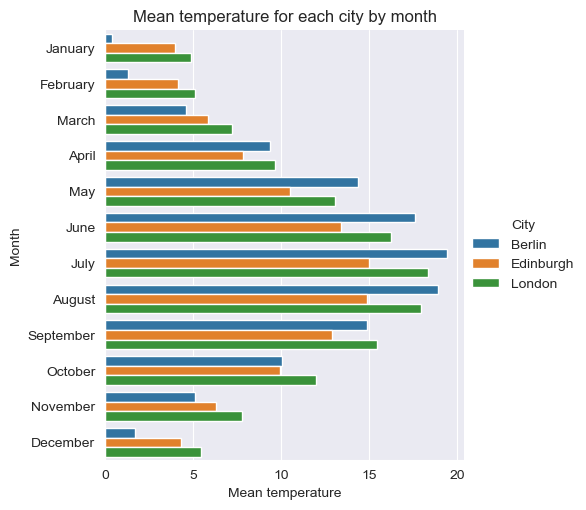

In [23]:
months = ["January", "February", "March", "April", "May", \
          "June", "July", "August", "September", "October", \
          "November", "December"]

sns.catplot(
    data=mean_temp,
    y="Month",
    x="Mean temperature",
    hue="City",
    kind="bar",
    order=months
)
plt.title("Mean temperature for each city by month");

Sometimes we want to plot the data in a specific order. For instance, from January to Decemember. We can use the module `CategoricalDtype` from `pandas.api.types`

In [ ]:
from pandas.api.types import CategoricalDtype

months = ["January", "February", "March", "April", "May", \
          "June", "July", "August", "September", "October", \
          "November", "December"]

mean_temp["Month"] = mean_temp["Month"].astype(
    CategoricalDtype(categories=months, ordered=True)
)

In [ ]:
mean_temp.dtypes

City                  object
Month               category
Mean temperature     float64
dtype: object

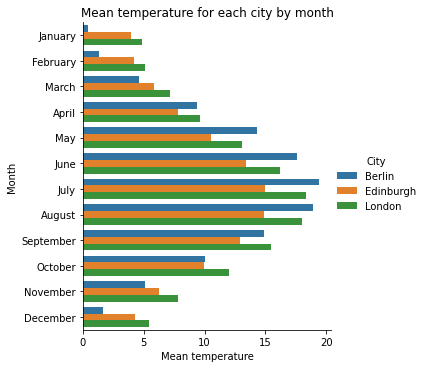

In [ ]:
sns.catplot(
    data=mean_temp,
    y="Month",
    x="Mean temperature",
    hue="City",
    kind="bar"
)
plt.title("Mean temperature for each city by month");

## Reshape dataframe from long (tidy) to wide (summary) 
Sometime we may want to take data frame with fewer columns, say in long format, summarize and convert into a data frame with multiple columns, i.e. a wide data frame. We can use pandas function `pivot_table` to help us with the summarization and conversion of dataframe in long form to dataframe in wide form.

In [ ]:
world = pd.read_csv("https://raw.githubusercontent.com/csbfx/advpy122-data/master/world_data.csv")
world

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623


Let us see a simple example of python `pivot_table` using a dataframe with just two columns. Let us subset our dataframe to contain just two columns: `continent` and `lifeExp`.

In [ ]:
# simple example with pivot_table
pd.pivot_table(world, values='lifeExp', columns='continent')

continent,Africa,Americas,Asia,Europe,Oceania
lifeExp,48.86533,64.658737,60.064903,71.903686,74.326208


In [ ]:
# simple example with pivot_table
pd.pivot_table(world, values=['lifeExp', 'gdpPercap'], columns='continent')

continent,Africa,Americas,Asia,Europe,Oceania
gdpPercap,2193.754578,7136.110356,7902.150428,14469.475533,18621.609223
lifeExp,48.865330,64.658737,60.064903,71.903686,74.326208


Here we use `pivot_table` to convert the long dataframe to a wide dataframe, and computes the mean lifeExp across continents. `pd.pivot_table` with the dataframe `world` as one of the arguments and specify which variable we would like use for columns (`continent`) and which variable we would like to summarize (`lifeExp`). One of the arguments of `pivot_table`, `aggfunc` has mean as default.

In the above example we used `pivot_table` to compute mean `lifeExp` for each continent. We can compute mean lifeExp for each country, by simply specifying "country" for columns argument.

In [ ]:
country = world[['country', 'lifeExp']]
country

,country,lifeExp
0,Afghanistan,28.801
1,Afghanistan,30.332
2,Afghanistan,31.997
3,Afghanistan,34.020
4,Afghanistan,36.088
...,...,...
1699,Zimbabwe,62.351
1700,Zimbabwe,60.377
1701,Zimbabwe,46.809
1702,Zimbabwe,39.989


In [ ]:
pd.pivot_table(country, values='lifeExp', columns='country', aggfunc="mean")

country,Afghanistan,Albania,Algeria,Angola,Argentina,Australia,Austria,Bahrain,Bangladesh,Belgium,...,Uganda,United Kingdom,United States,Uruguay,Venezuela,Vietnam,West Bank and Gaza,Yemen Rep.,Zambia,Zimbabwe
lifeExp,37.478833,68.432917,59.030167,37.8835,69.060417,74.662917,73.10325,65.605667,49.834083,73.64175,...,47.618833,73.922583,73.4785,70.781583,66.580667,57.4795,60.328667,46.780417,45.996333,52.663167


## Pandas `pivot_table` on dataframes with three columns
Pandas `pivot_table` becomes more powerful when we try to summarize and convert a tidy dataframe with more than two variables into a wide dataframe. 

In [ ]:
world3 = world[['continent', 'year', 'lifeExp']]
world3

,continent,year,lifeExp
0,Asia,1952,28.801
1,Asia,1957,30.332
2,Asia,1962,31.997
3,Asia,1967,34.020
4,Asia,1972,36.088
...,...,...,...
1699,Africa,1987,62.351
1700,Africa,1992,60.377
1701,Africa,1997,46.809
1702,Africa,2002,39.989


In [ ]:
# pivot table example with three columns
pd.pivot_table(world3, values='lifeExp',
               index=['year'],
               columns='continent',
               aggfunc='min'
               )

continent,Africa,Americas,Asia,Europe,Oceania
year,,,,,
1952,30.000,37.579,28.801,43.585,69.120
1957,31.570,40.696,30.332,48.079,70.260
1962,32.767,43.428,31.997,52.098,70.930
1967,34.113,45.032,34.020,54.336,71.100
1972,35.400,46.714,36.088,57.005,71.890
1977,36.788,49.923,31.220,59.507,72.220
1982,38.445,51.461,39.854,61.036,73.840
1987,39.906,53.636,40.822,63.108,74.320
1992,23.599,55.089,41.674,66.146,76.330


## `pivot_table` with Different Aggregating Function
`pivot_table` uses mean function for aggregating or summarizing data by default. We can change the aggregating function, if needed. For example, we can use `aggfunc='min'` to compute "minimum" lifeExp instead of "mean" lifeExp for each year and continent values.

In [ ]:
pd.pivot_table(world3, values='lifeExp',
               index=['year'],
               columns='continent',
               aggfunc='min')

continent,Africa,Americas,Asia,Europe,Oceania
year,,,,,
1952,30.000,37.579,28.801,43.585,69.120
1957,31.570,40.696,30.332,48.079,70.260
1962,32.767,43.428,31.997,52.098,70.930
1967,34.113,45.032,34.020,54.336,71.100
1972,35.400,46.714,36.088,57.005,71.890
1977,36.788,49.923,31.220,59.507,72.220
1982,38.445,51.461,39.854,61.036,73.840
1987,39.906,53.636,40.822,63.108,74.320
1992,23.599,55.089,41.674,66.146,76.330


We can also specify more than one aggregating functions. For example, if we are interested in bot minimum and maximum values of lifeExp for each year and continent, we can specify the functions as a list to the argument "aggfunc".

In [ ]:
pd.pivot_table(world3, values='lifeExp',
               index=['year'],
               columns='continent',
               aggfunc=["min", "max", "mean"])

min                                      max                   \
continent  Africa Americas    Asia  Europe Oceania  Africa Americas    Asia   
year                                                                          
1952       30.000   37.579  28.801  43.585  69.120  52.724   68.750  65.390   
1957       31.570   40.696  30.332  48.079  70.260  58.089   69.960  67.840   
1962       32.767   43.428  31.997  52.098  70.930  60.246   71.300  69.390   
1967       34.113   45.032  34.020  54.336  71.100  61.557   72.130  71.430   
1972       35.400   46.714  36.088  57.005  71.890  64.274   72.880  73.420   
1977       36.788   49.923  31.220  59.507  72.220  67.064   74.210  75.380   
1982       38.445   51.461  39.854  61.036  73.840  69.885   75.760  77.110   
1987       39.906   53.636  40.822  63.108  74.320  71.913   76.860  78.670   
1992       23.599   55.089  41.674  66.146  76.330  73.615   77.950  79.360   
1997       36.087   56.671  41.763  68.835  77.550  74.772   78.610  80.690   
2002       39.193   58.137  42.129  70.845  79.110  75.744   79.770  82.000   
2007       39.613   60.916  43.828  71.777  80.204  76.442   80.653  82.603   

                                mean                                           
continent  Europe Oceania     Africa  Americas       Asia     Europe  Oceania  
year                                                                           
1952       72.670  69.390  39.135500  53.27984  46.314394  64.408500  69.2550  
1957       73.470  70.330  41.266346  55.96028  49.318544  66.703067  70.2950  
1962       73.680  71.240  43.319442  58.39876  51.563223  68.539233  71.0850  
1967       74.160  71.520  45.334538  60.41092  54.663640  69.737600  71.3100  
1972       74.720  71.930  47.450942  62.39492  57.319269  70.775033  71.9100  
1977       76.110  73.490  49.580423  64.39156  59.610556  71.937767  72.8550  
1982       76.990  74.740  51.592865  66.22884  62.617939  72.806400  74.2900  
1987       77.410  76.320  53.344788  68.09072  64.851182  73.642167  75.3200  
1992       78.770  77.560  53.629577  69.56836  66.537212  74.440100  76.9450  
1997       79.390  78.830  53.598269  71.15048  68.020515  75.505167  78.1900  
2002       80.620  80.370  53.325231  72.42204  69.233879  76.700600  79.7400  
2007       81.757  81.235  54.806038  73.60812  70.728485  77.648600  80.7195

When we give multiple aggregating functions, we would get a multi-indexed data frame as output.